## Clustering


- Set to `true` if runnig in Colab

In [1]:
RUNNING_IN_COLAB = False

### Import google drive

In [2]:
if RUNNING_IN_COLAB:

    from google.colab import drive

    #Mount drive
    drive.mount('/content/drive', force_remount=True)

### Import modules

In [3]:
import pandas

import matplotlib.pyplot as plt

import sklearn.cluster as cluster
import sklearn.decomposition as decomposition

### Reading dataset CSV

In [4]:
if RUNNING_IN_COLAB:
    CSV_PATH = '/content/drive/My Drive/Colab Notebooks/DataScience/All_Infogain.csv'
else:   
    CSV_PATH = '../../dataset/FinalDataset/All_Infogain.csv'

CLASS_LABEL_COLUMN = 'class'

# Reads CSV file with data
df = pandas.read_csv(CSV_PATH)

#Remove valuens with 'NaN'
df.dropna(inplace=True) 

df.head()

,avgpathtokenlen,pathurlRatio,ArgUrlRatio,argDomanRatio,domainUrlRatio,pathDomainRatio,argPathRatio,CharacterContinuityRate,NumberRate_URL,NumberRate_FileName,NumberRate_AfterPath,Entropy_Domain,class
0,105.0,0.876,0.008,0.087,0.095,9.174,0.010,0.435,0.199,0.219,-1.0,0.904,phishing
1,66.0,0.874,0.009,0.091,0.096,9.136,0.010,0.682,0.257,0.293,-1.0,0.870,phishing
2,66.0,0.874,0.009,0.091,0.096,9.136,0.010,0.682,0.000,0.000,-1.0,0.870,phishing
3,66.0,0.874,0.009,0.091,0.096,9.136,0.010,0.682,0.000,0.000,-1.0,0.870,phishing
4,65.0,0.948,0.006,0.182,0.032,30.000,0.006,0.727,0.141,0.141,-1.0,1.000,benign


### Set number of clusters as number of classes

In [5]:
n_clusters = len(df[CLASS_LABEL_COLUMN].unique())
print(f"Using {n_clusters} clusters for classes:", df[CLASS_LABEL_COLUMN].unique())

Using 5 clusters for classes: ['phishing' 'benign' 'Defacement' 'malware' 'spam']


### Normalize data

In [6]:
from sklearn.preprocessing import normalize

df_data = df.drop(columns=[CLASS_LABEL_COLUMN])
df_norm = normalize(df_data)
print(df_norm)

[[ 9.96075809e-01  8.31011818e-03  7.58914902e-05 ...  2.07752955e-03
  -9.48643628e-03  8.57573840e-03]
 [ 9.90203040e-01  1.31126887e-02  1.35027687e-04 ...  4.39590138e-03
  -1.50030764e-02  1.30526764e-02]
 [ 9.90219969e-01  1.31129129e-02  1.35029996e-04 ...  0.00000000e+00
  -1.50033329e-02  1.30528996e-02]
 ...
 [ 5.10214176e-01  5.00009892e-02  2.50004946e-02 ...  0.00000000e+00
  -5.10214176e-01  3.71946134e-01]
 [ 5.01837833e-01  5.26929725e-02  2.65974052e-02 ...  0.00000000e+00
  -5.01837833e-01  3.58312213e-01]
 [ 3.74073965e-01  7.01038166e-02  2.80415266e-02 ...  0.00000000e+00
  -5.60830533e-01  4.82875089e-01]]


### Kmeans execution

In [7]:
kmeans = cluster.KMeans(init="k-means++", n_clusters=n_clusters, random_state=0)

pred_y = kmeans.fit_predict(df_norm)
centroids = kmeans.cluster_centers_

print(centroids)

[[ 0.77472959  0.11022747  0.0163631   0.07384674  0.03693097  0.55108976
   0.02620339  0.10814487  0.01531327  0.0206056  -0.08370717  0.14102622]
 [ 0.54335628  0.1204405   0.08822787  0.45796502  0.03508117  0.63403283
   0.12409859  0.10221709  0.01778656  0.02647957  0.02831962  0.13826529]
 [ 0.28525699  0.08502803  0.07194395  0.60369238  0.01536973  0.70449552
   0.09098172  0.06569634  0.01071826  0.00861721  0.01010068  0.09038655]
 [ 0.88709943  0.0948852   0.01009839  0.02673071  0.08096823  0.28407827
   0.02550602  0.11898879  0.01118339  0.02501198 -0.18719554  0.16848759]
 [ 0.53171709  0.09730074  0.00482607  0.03651392  0.01673062  0.80401068
   0.00631268  0.08747024  0.0112394  -0.02068978 -0.10365319  0.10988199]]


### Reduces data to 2 dimensions for plotting

In [8]:
#reduce the data to 2 dimensions with PCA
reduced_data = decomposition.PCA(n_components=2).fit_transform(df_norm)
print(reduced_data)

#reduce the centroids to 2 dimensions with PCA
reduced_centroids = decomposition.PCA(n_components=2).fit_transform(centroids)
print(reduced_centroids)

[[-0.49426147 -0.2188268 ]
 [-0.47009457 -0.1832973 ]
 [-0.47004812 -0.1829881 ]
 ...
 [-0.34183924 -0.26561943]
 [-0.33102884 -0.26108791]
 [-0.2613779  -0.2239711 ]]
[[-0.23707259  0.0313314 ]
 [ 0.224028   -0.11148392]
 [ 0.49884512 -0.06906066]
 [-0.46227443 -0.16037511]
 [-0.02352609  0.3095883 ]]


### Plot Kmeans clusters graph with reduced data

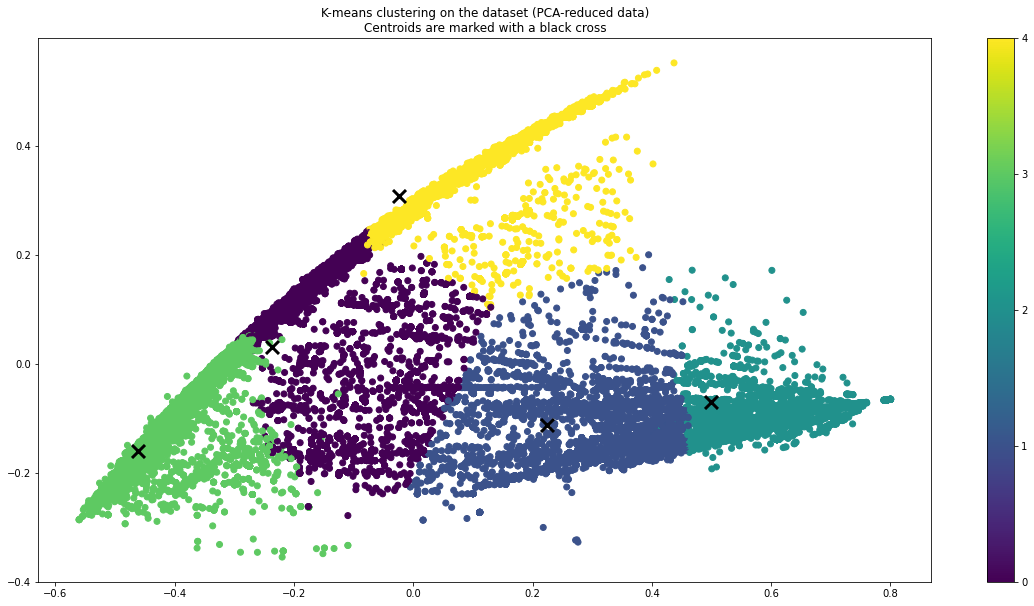

In [9]:
#Plot a point for each sample, using the assigned cluster as a color
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=pred_y)
cbar = plt.colorbar(ticks=range(0, n_clusters))

# Plot the centroids as X
plt.scatter(
    reduced_centroids[:, 0],
    reduced_centroids[:, 1],
    marker="x",
    s=169,
    linewidths=3,
    color="black",
    zorder=10
)


plt.title(
    "K-means clustering on the dataset (PCA-reduced data)\n"
    "Centroids are marked with a black cross"
)

plt.gcf().set_size_inches(20, 10)

### Plot Class cluster graph with reduced data

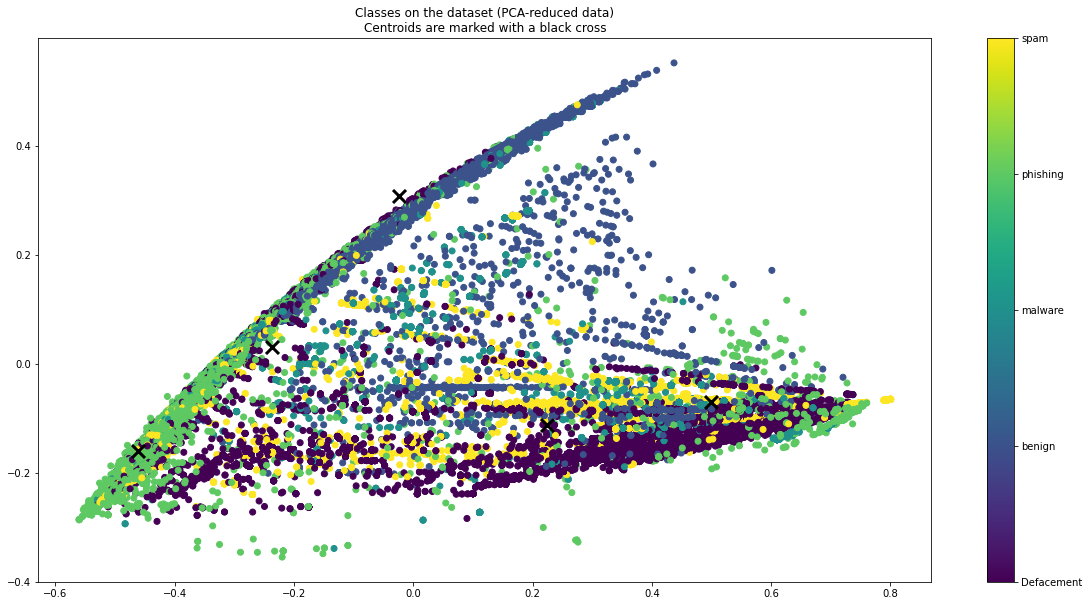

In [10]:
class_color = df[CLASS_LABEL_COLUMN].astype("category").cat.codes
class_labels = df[CLASS_LABEL_COLUMN].unique()

#Plot a point for each sample, using the assigned cluster as a color
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=class_color)

cbar = plt.colorbar(ticks=class_color.unique())
cbar.ax.set_yticklabels(class_labels)


# Plot the centroids as X
plt.scatter(
    reduced_centroids[:, 0],
    reduced_centroids[:, 1],
    marker="x",
    s=169,
    linewidths=3,
    color="black",
    zorder=10
)


plt.title(
    "Classes on the dataset (PCA-reduced data)\n"
    "Centroids are marked with a black cross"
)

plt.gcf().set_size_inches(20, 10)

### How many samples are in each cluster

In [11]:
df_clusters = pandas.DataFrame()
df_clusters['Cluster'] = pred_y
df_clusters['Class'] = df['class']

cluster_groups = df_clusters.value_counts()
print(cluster_groups)

Cluster  Class     
3        phishing      5284
0        benign        3180
4        benign        3154
1        Defacement    2671
0        malware       2396
1        spam          2174
2        Defacement    1999
3        Defacement    1739
0        spam          1638
3        malware       1575
2        spam          1460
0        Defacement    1453
3        spam          1338
0        phishing      1229
2        malware        989
1        malware        915
4        malware        832
1        benign         598
3        benign         559
2        phishing       432
         benign         285
1        phishing       195
4        phishing       171
         spam            83
         Defacement      68
dtype: int64
